In [13]:
# Week 4 — Video 1: Log Transformations & Skewness Handling (Hands-on)
# dataset: retail_sales_week4.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer

# -----------------------------
# 1) Load dataset
# -----------------------------
df = pd.read_csv("D:/datasets/dpp/retail_sales_week4.csv")

cols = ["annual_income", "monthly_spend", "avg_basket_value", "marketing_spend"]

print("Shape:", df.shape)
print("\nMissing %:")
print((df[cols].isna().mean() * 100).round(2))


Shape: (1000, 16)

Missing %:
annual_income       5.9
monthly_spend       0.0
avg_basket_value    0.0
marketing_spend     3.0
dtype: float64


In [15]:
# -----------------------------
# 3) Data cleaning BEFORE log
#    - annual_income: 0 treated as missing (common missing-coding)
#    - marketing_spend: negative treated as missing (data entry error)
#    - impute missing with median (simple + robust)
# -----------------------------
df_clean = df.copy()

df_clean.loc[df_clean["annual_income"] <= 0, "annual_income"] = np.nan
df_clean.loc[df_clean["marketing_spend"] < 0, "marketing_spend"] = np.nan

for c in cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())

print("\nMissing %:")
print((df_clean[cols].isna().mean() * 100).round(2))


Missing %:
annual_income       0.0
monthly_spend       0.0
avg_basket_value    0.0
marketing_spend     0.0
dtype: float64


In [16]:
# -----------------------------
# 4) Apply log transform safely (positive-only)
#    Using log1p to be safe with small values
# -----------------------------
df_log = df_clean.copy()
for c in cols:
    # all should be >0 after cleaning; log1p is still safer
    df_log[c] = np.log1p(df_log[c])

# -----------------------------
# 5) Optional: Power Transform (Yeo-Johnson) for comparison
# -----------------------------
pt = PowerTransformer(method="yeo-johnson", standardize=False)
df_power = df_clean.copy()
df_power[cols] = pt.fit_transform(df_power[cols])



In [17]:
# -----------------------------
# 6) Compare skewness after transforms
# -----------------------------
compare = pd.DataFrame({
    "skew_raw": df_clean[cols].skew(),
    "skew_log1p": df_log[cols].skew(),
    "skew_power(YJ)": df_power[cols].skew(),
}).round(3)

print("\nSkewness comparison (lower magnitude is better):")
print(compare)




Skewness comparison (lower magnitude is better):
                  skew_raw  skew_log1p  skew_power(YJ)
annual_income        9.082       0.667          -0.055
monthly_spend       10.098       0.273          -0.016
avg_basket_value    14.950       0.235          -0.007
marketing_spend      7.570       0.174          -0.005


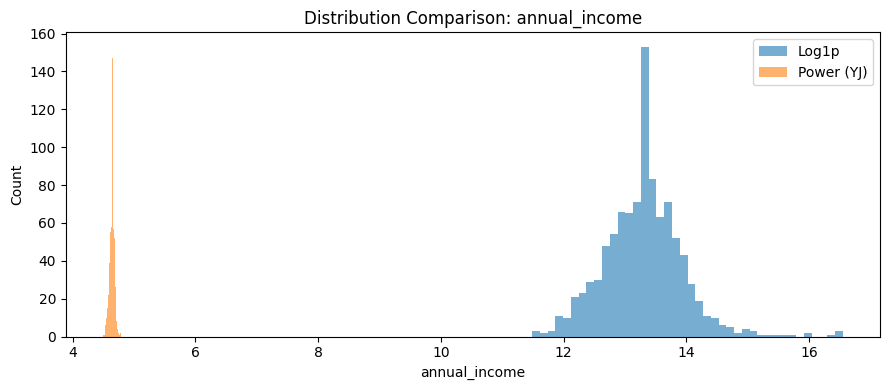

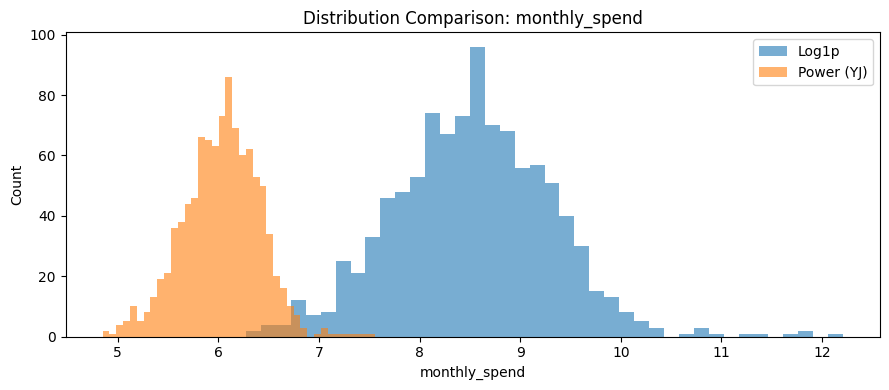

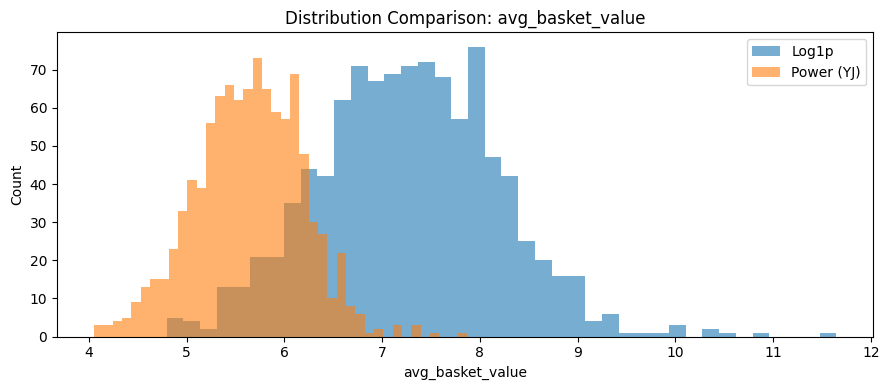

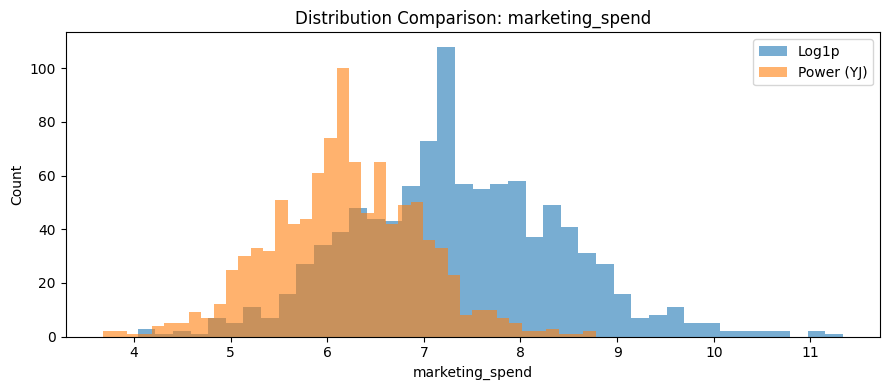

In [19]:
# -----------------------------
# 7) Visualize: Before vs After (Raw vs Log1p vs Power)
# -----------------------------
def plot_before_after(col: str):
    fig, ax = plt.subplots(figsize=(9, 4))
    #ax.hist(df_clean[col], bins=40, alpha=0.6, label="Raw (cleaned)")
    ax.hist(df_log[col], bins=40, alpha=0.6, label="Log1p")
    ax.hist(df_power[col], bins=40, alpha=0.6, label="Power (YJ)")
    ax.set_title(f"Distribution Comparison: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend()
    plt.tight_layout()
    plt.show()

for c in cols:
    plot_before_after(c)


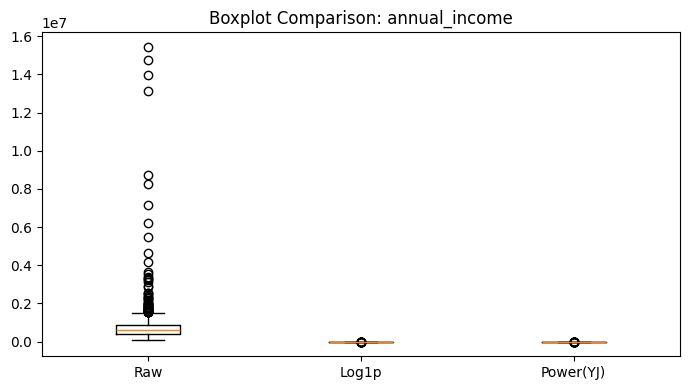

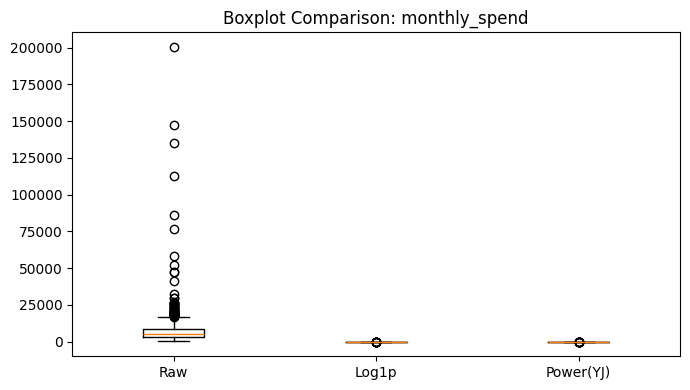

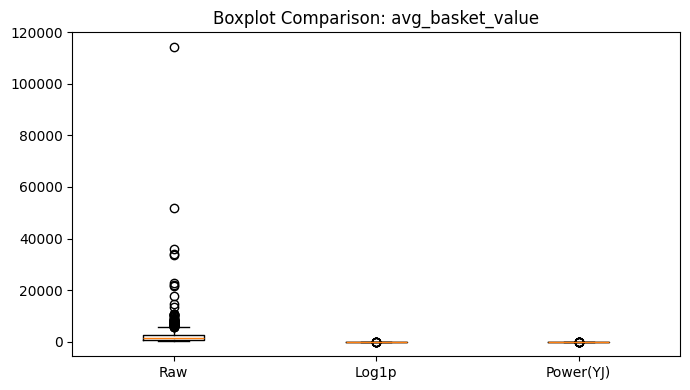

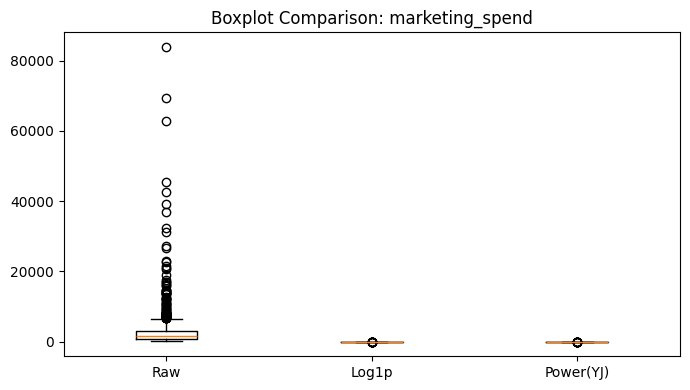

In [20]:
# -----------------------------
# 8) Boxplots (good for seeing outliers compression)
# -----------------------------
def boxplot_compare(col: str):
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.boxplot(
        [df_clean[col].values, df_log[col].values, df_power[col].values],
        tick_labels=["Raw","Log1p", "Power(YJ)"],
        showfliers=True
    )
    ax.set_title(f"Boxplot Comparison: {col}")
    plt.tight_layout()
    plt.show()

for c in cols:
    boxplot_compare(c)
